In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("exp8_shows.csv")
df

,Age,Experience,Rank,Nationality,Go
0,36,10,9,UK,NO
1,42,12,4,USA,NO
2,23,4,6,N,NO
3,52,4,4,USA,NO
4,43,21,8,USA,YES
5,44,14,5,UK,NO
6,66,3,7,N,YES
7,35,14,9,UK,YES
8,52,13,7,N,YES
9,35,5,9,N,YES


In [4]:
d = {'UK': 0, 'USA': 1, 'N': 2}
df['Nationality'] = df['Nationality'].map(d)
d = {'YES': 1, 'NO': 0}
df['Go'] = df['Go'].map(d)
print(df)

    Age  Experience  Rank  Nationality  Go
0    36          10     9            0   0
1    42          12     4            1   0
2    23           4     6            2   0
3    52           4     4            1   0
4    43          21     8            1   1
5    44          14     5            0   0
6    66           3     7            2   1
7    35          14     9            0   1
8    52          13     7            2   1
9    35           5     9            2   1
10   24           3     5            1   0
11   18           3     7            0   1
12   45           9     9            0   1


In [5]:
features = ['Age', 'Experience', 'Rank', 'Nationality']
X = df[features]
y = df['Go']

In [6]:
dtree = DecisionTreeClassifier()
dtree = dtree.fit(X, y)

In [7]:
print(dtree.predict([[40, 10, 7, 1]]))
print("[1] means 'GO'")
print("[0] means 'NO'")

[1]
[1] means 'GO'
[0] means 'NO'


C:\Users\WADEHRA\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [8]:
df = pd.read_csv('exp8_DT.csv')
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
input = df.iloc[:, :-1]
Target = df.iloc[:, -1]
le_sex = LabelEncoder()
le_BP = LabelEncoder()
le_cholesterol = LabelEncoder()
input['Sex'] = le_sex.fit_transform(input['Sex'])
input['BP'] = le_BP.fit_transform(input['BP'])
input['Cholesterol'] = le_cholesterol.fit_transform(input['Cholesterol'])
input

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,0,0,0,25.355
1,47,1,1,0,13.093
2,47,1,1,0,10.114
3,28,0,2,0,7.798
4,61,0,1,0,18.043
...,...,...,...,...,...
195,56,0,1,0,11.567
196,16,1,1,0,12.006
197,52,1,2,0,9.894
198,23,1,2,1,14.020


In [10]:
X_train, X_test, y_train, y_test = train_test_split(input, Target, test_size=0.3, random_state=42)
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
print("Model Accuracy:", round(accuracy*100,1) )

Model Accuracy: 100.0


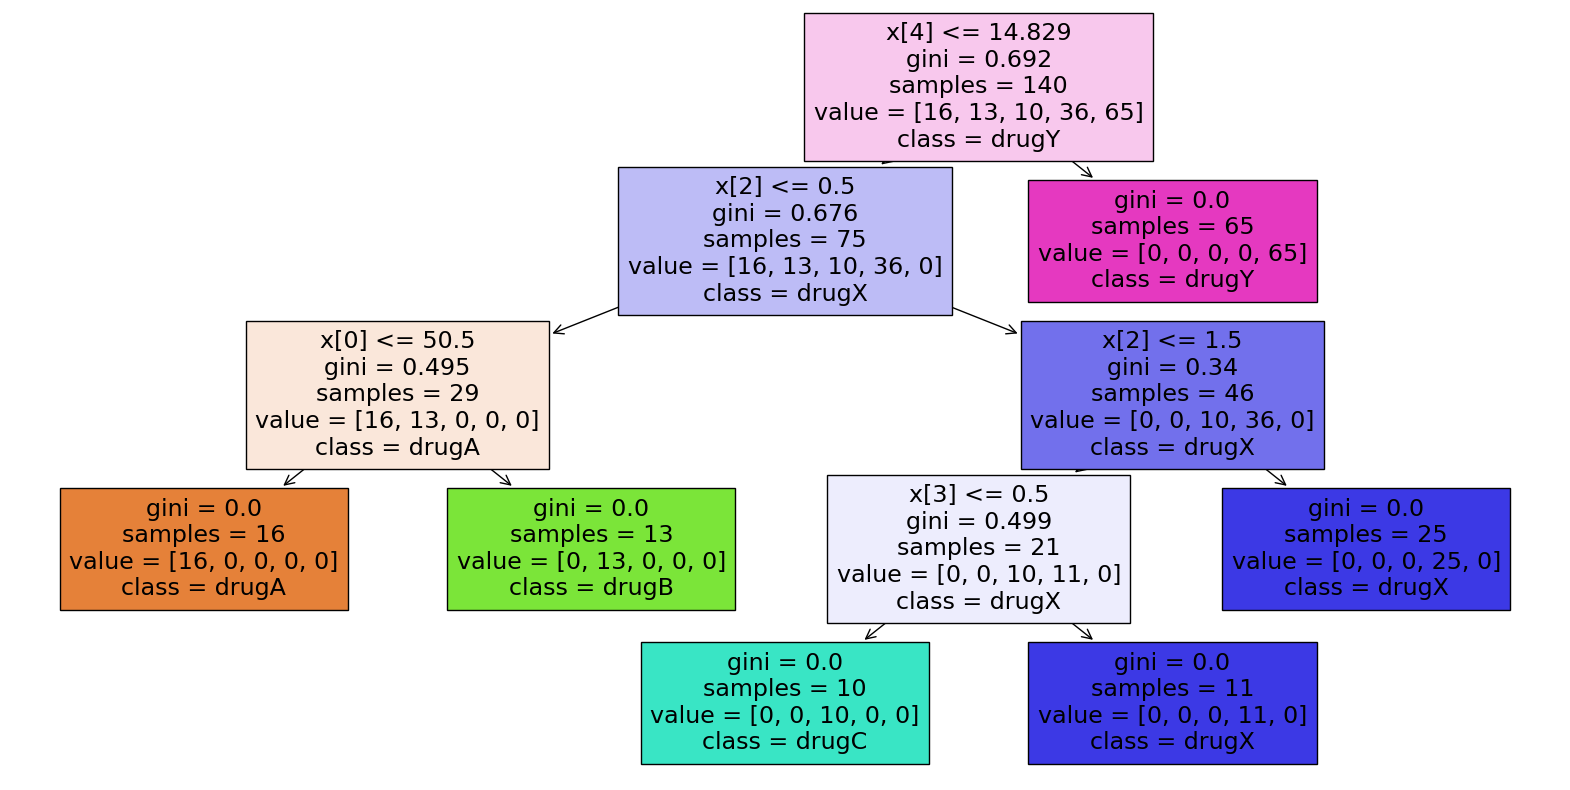

In [11]:
import numpy as np
from sklearn.tree import plot_tree
unique_classes = np.unique(y_train).tolist()  
plt.figure(figsize=(20, 10))
plot_tree(clf, class_names=unique_classes, filled=True)
plt.show()

In [12]:
y_pred = clf.predict(X_test)

In [13]:
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, accuracy_score

In [14]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         7
       drugB       1.00      1.00      1.00         3
       drugC       1.00      1.00      1.00         6
       drugX       1.00      1.00      1.00        18
       drugY       1.00      1.00      1.00        26

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



In [15]:
print(confusion_matrix(y_test, y_pred))

[[ 7  0  0  0  0]
 [ 0  3  0  0  0]
 [ 0  0  6  0  0]
 [ 0  0  0 18  0]
 [ 0  0  0  0 26]]


In [16]:
print(precision_score(y_test, y_pred, average='micro'))

1.0


In [17]:
print(recall_score(y_test, y_pred, average='macro'))

1.0


In [18]:
print(accuracy_score(y_test, y_pred))

1.0
